# IMPORTING LIBRARIES TO BUILD MODEL

In [1]:
#library to train the model
import keras
import tensorflow


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D, Flatten

# IMPORTING LIBRARIES FOR IMAGE AUGMENTATION

In [2]:
#image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

# ADDING STREAMING_BODY_OBJECT FOR DATASET.ZIP

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_lGT7V2dL4xuZrXIMKArbCWtDgDwucxQdlRbKnVt_VRL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassificationmodel-donotdelete-pr-w7f8uixbsjmypc'
object_key = 'conversation engine for deaf and dumb.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
pwd

'/home/wsuser/work'

# UNZIPPING THE DATASET

In [5]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [6]:

ls

Dataset/


In [7]:

pwd

'/home/wsuser/work'

In [8]:
#checking that the dataset is there are not
import os
filenamer = os.listdir('/home/wsuser/work/Dataset/training_set')

# TRAINING AND TESTING IMAGES UNDER CLASSES

In [9]:
x_train=train_datagen.flow_from_directory("/home/wsuser/work/Dataset/training_set",target_size=(64,64),class_mode="categorical",batch_size=25)

Found 15750 images belonging to 9 classes.


In [10]:
x_test=test_datagen.flow_from_directory("/home/wsuser/work/Dataset/test_set",target_size=(64,64),
class_mode='categorical' , batch_size=25)

Found 2250 images belonging to 9 classes.


# TOTAL CLASSES UNDER TRAINING AND TESTING.

In [11]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [12]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [14]:
test_datagen=ImageDataGenerator(rescale=1./255)

# MODEL BUILDING USING CNN

In [15]:
model=Sequential()

In [16]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:

model.add(Flatten())

In [19]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# ADDING LAYERS FOR MODEL TRAINING.

# HIDDEN LAYERS

In [20]:
model.add(Dense(units = 300, activation='relu'))
#model.add(Dense(unit = 150,init = "uniform" activation='softmax'))

# OUTPUT LAYERS

In [21]:
model.add(Dense(units = 9, activation='softmax'))

# OPTIMIZING THE MODEL

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
len(x_train)

630

In [24]:
len(x_test)


90

# FITTING THE MODEL

In [26]:
### model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=630,epochs=10,validation_data=x_test,validation_steps=90)
#model.fit(x_train, epochs=100, verbose=1)

Epoch 1/10


/tmp/wsuser/ipykernel_164/1177640488.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=630,epochs=10,validation_data=x_test,validation_steps=90)


630/630 [==============================] - 152s 242ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.6417 - val_accuracy: 0.9773
Epoch 2/10
630/630 [==============================] - 154s 244ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.4720 - val_accuracy: 0.9787
Epoch 3/10
630/630 [==============================] - 153s 242ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.6872 - val_accuracy: 0.9760
Epoch 4/10
630/630 [==============================] - 155s 245ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.6805 - val_accuracy: 0.9778
Epoch 5/10
630/630 [==============================] - 153s 242ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.6058 - val_accuracy: 0.9778
Epoch 6/10
630/630 [==============================] - 157s 249ms/step - loss: 3.6430e-04 - accuracy: 0.9999 - val_loss: 0.7764 - val_accuracy: 0.9782
Epoch 7/10
630/630 [==============================] - 154s 245ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.5778 - val_ac

# SAVING THE MODEL

In [27]:
ls

Dataset/


In [28]:
pwd

'/home/wsuser/work'

In [34]:
model.save('Dataset.h5')


In [31]:
ls

Dataset/  Dataset.h5


# CONVERTING ZIP FILE TO TAR FILE FOR LOCAL USE.

In [32]:
!tar -zcvf image.Classification.model_new.tgz Dataset.h5

Dataset.h5


In [33]:
ls -1

Dataset/
Dataset.h5
image.Classification.model_new.tgz


# INSTALLING WATSON MACHINE LEARNING CLIENT SOFTWARE

In [35]:
#installing the machine learning repository
!pip install watson_machine_learning_client --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 kB 49.9 MB/s eta 0:00:00


# IMPORTING APICLIENT FOR DEPLOYING.

In [36]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    #"apikey": "sqLVTXSP3nnAKfzJ1rKRKCpNzS_XZ8_HXa9FRwV7BvOP"
    "apikey":  "Ac5bHHoUOjMwiO_Qwe4mWjPz37o3B6HO2V5gPXKQpNqt"
}
client = APIClient(url_credentials)

In [37]:
client = APIClient(url_credentials)
client

# CREATING API_CLIENT SPACE ID.

In [44]:
def guid_from_space_name(client, Deployment):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == Deployment)['metadata']['id'])

In [45]:
space_uid = guid_from_space_name(client, 'Deployment')
print("space UID = " + space_uid)

space UID = 07ec5e46-10fc-445b-b7aa-527a129ea374


In [47]:
client.set.default_space(space_uid)

'SUCCESS'

In [53]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [50]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [54]:
ls

Dataset/  Dataset.h5  image.Classification.model_new.tgz


In [55]:
!tar -zcvf image.Classification.model_new.tgz Dataset.h5

Dataset.h5


In [57]:
model_details = client.repository.store_model(model='image.Classification.model_new.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"})
model_id = client.repository.get_model_id(model_details)

In [58]:
model_details=client.repository.store_model(model="image.Classification.model_new.tgz",meta_props={
client.repository.ModelMetaNames.NAME: "CNN Model Building",
client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

In [59]:
model.save('Dataset.h5')

# DOWNLOADING THE TAR FILE ON CLIENT REPOSITORY

In [60]:
client.repository.download(model_id, 'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

# TEST THE MODEL

In [72]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2

# LOADING THE DATASET

In [62]:
#Load the model
model=load_model('Dataset.h5')

# ADDING STREAMING_BODY FOR TEST IMAGE.

# TESTING ON SEVERAL TESTING IMAGES

In [63]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_lGT7V2dL4xuZrXIMKArbCWtDgDwucxQdlRbKnVt_VRL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassificationmodel-donotdelete-pr-w7f8uixbsjmypc'
object_key = 'conversation engine for deaf and dumb.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [64]:
ls

Dataset/  Dataset.h5  image.Classification.model_new.tgz  my_model.tar.gz


In [65]:
pwd

'/home/wsuser/work'

In [66]:
cd /home/wsuser/work/Dataset/test_set/

/home/wsuser/work/Dataset/test_set


In [67]:
ls

A/  B/  C/  D/  E/  F/  G/  H/  I/


In [68]:
cd /home/wsuser/work/Dataset/test_set/A/

/home/wsuser/work/Dataset/test_set/A


In [69]:
ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [73]:
#img = image.load_img(streaming_body_8,target_size=(64, 64))
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/A/100.png")

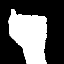

In [74]:
img

In [77]:
cd /home/wsuser/work/Dataset/test_set/C/

/home/wsuser/work/Dataset/test_set/C


In [78]:
ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [79]:
img2=image.load_img(r"/home/wsuser/work/Dataset/test_set/C/101.png")

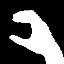

In [80]:
img2

In [81]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [82]:
x=np.expand_dims(x,axis=1)
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       ...,


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [86]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [87]:
index=['A','B','C','D','E','F','G','H','I']

In [89]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/A/90.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

1/1 [==============================] - 0s 66ms/step


'A'

In [90]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/G/1.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x), axis=1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

1/1 [==============================] - 0s 31ms/step


'G'

In [91]:
img=image.load_img( "/home/wsuser/work/Dataset/test_set/D/1.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis = 1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

1/1 [==============================] - 0s 30ms/step


'D'

In [92]:

ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [93]:
cd /home/wsuser/work/

/home/wsuser/work


In [94]:
!tar -zcvf Dataset-classification-model.tgz Dataset.h5

Dataset.h5


In [95]:
ls  # we have three 1.)Dataset-classification-model.tgz and 2.)Dataset.h5


Dataset/                          image.Classification.model_new.tgz
Dataset-classification-model.tgz  my_model.tar.gz
Dataset.h5


In [96]:
import tensorflow as tf
tf .__version__

'2.9.2'

# IBM DEPLOYMENT

In [97]:
!pip install watson-machine-learning-client 

In [98]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    #"apikey": "sqLVTXSP3nnAKfzJ1rKRKCpNzS_XZ8_HXa9FRwV7BvOP"
    "apikey":  "Ac5bHHoUOjMwiO_Qwe4mWjPz37o3B6HO2V5gPXKQpNqt"
}
client = APIClient(url_credentials)

In [99]:
client